Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.5344 - accuracy: 0.4413 - val_loss: 0.4636 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.4293 - accuracy: 0.4879 - val_loss: 0.4057 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3982 - accuracy: 0.4915 - val_loss: 0.3865 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3823 - accuracy: 0.4940 - val_loss: 0.3713 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3702 - accuracy: 0.4960 - val_loss: 0.3594 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3606 - accuracy: 0.4977 - val_loss: 0.3496 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [====================

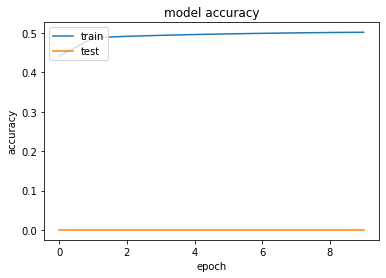

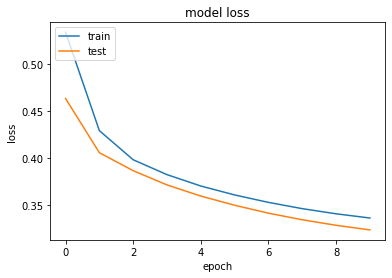

In [7]:
from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

[train_loss, train_acc] = autoencoder.evaluate(x_train_noisy, x_train)
[test_loss, test_acc] = autoencoder.evaluate(x_test_noisy, x_test)

print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_acc))
print(history.history.keys())

# use Matplotlib 
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.5376 - val_loss: 0.4502
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.4107 - val_loss: 0.3909
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3806 - val_loss: 0.3736
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3640 - val_loss: 0.3573
Epoch 5/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3517 - val_loss: 0.3493


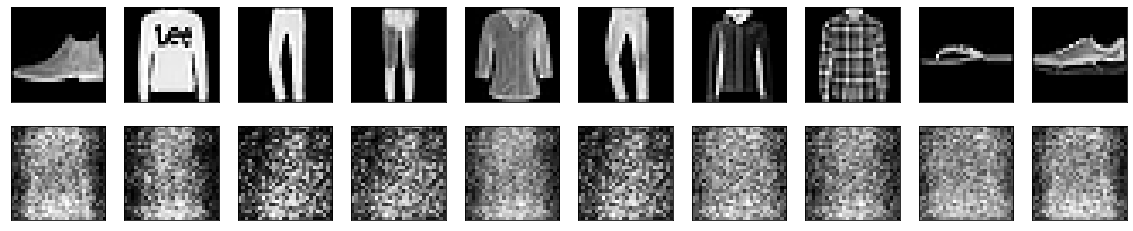

In [10]:
from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
hidden_1 = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_1)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)    


# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.5344 - accuracy: 0.4404 - val_loss: 0.4517 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.4258 - accuracy: 0.4880 - val_loss: 0.4006 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.4009 - accuracy: 0.4905 - val_loss: 0.3820 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3869 - accuracy: 0.4926 - val_loss: 0.3665 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3757 - accuracy: 0.4947 - val_loss: 0.3534 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3663 - accuracy: 0.4964 - val_loss: 0.3421 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [====================

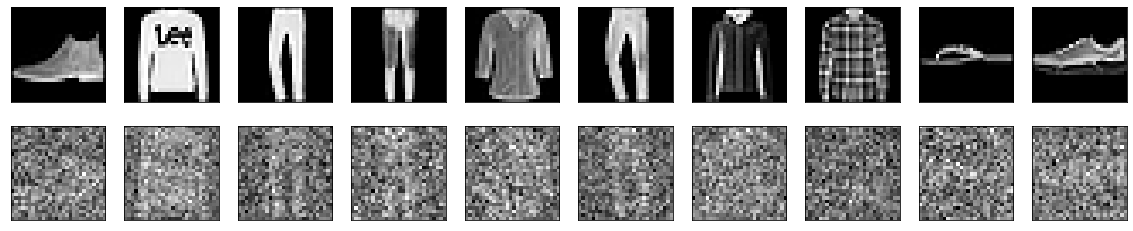

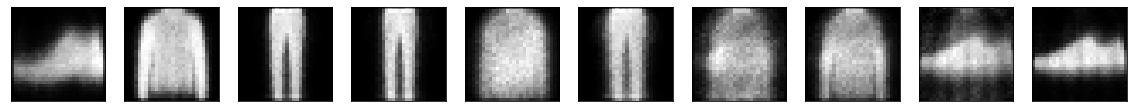

In [9]:
from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.8
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and noisy image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()
#displaying input and reconstructed images
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

